<a href="https://colab.research.google.com/github/Jaimon12/Superstore-Sales-Analytics-and-Predictive-Dashboard/blob/main/SUPERSTORE_DASHBORD_Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'global_superstore_2016.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Display shape and basic info
print("Dataset shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with missing critical values (Order Date, Ship Date, Region, Sales)
df.dropna(subset=['Order Date', 'Ship Date', 'Region', 'Sales'], inplace=True)

# Convert Order Date and Ship Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create a new column for Shipping Delay in days
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

# Clean negative or extremely high delays
df = df[(df['Shipping Delay'] >= 0) & (df['Shipping Delay'] <= 30)]

# Basic Descriptive Stats
print("\nSales Statistics:\n", df['Sales'].describe())
print("\nProfit Statistics:\n", df['Profit'].describe())
print("\nShipping Delay Statistics:\n", df['Shipping Delay'].describe())

# -----  -----


Dataset shape: (51290, 24)

Column Names: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']

Data Types:
 Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity    

# **EDA Visualizations**

/tmp/ipython-input-6-2927198100.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
/tmp/ipython-input-6-2927198100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')


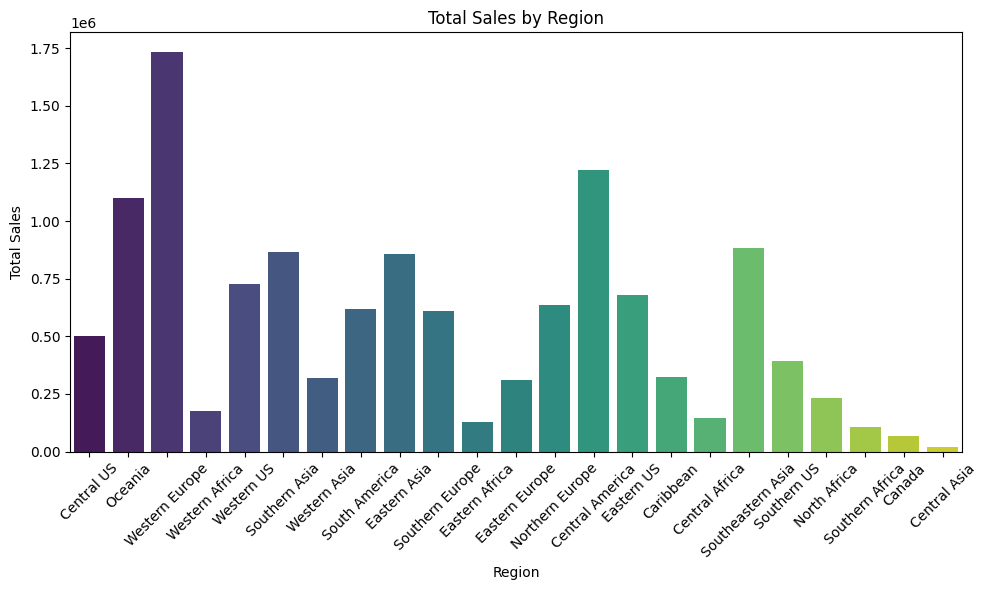

In [ ]:

# Sales by Region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-7-3178859498.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='magma')
/tmp/ipython-input-7-3178859498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='magma')


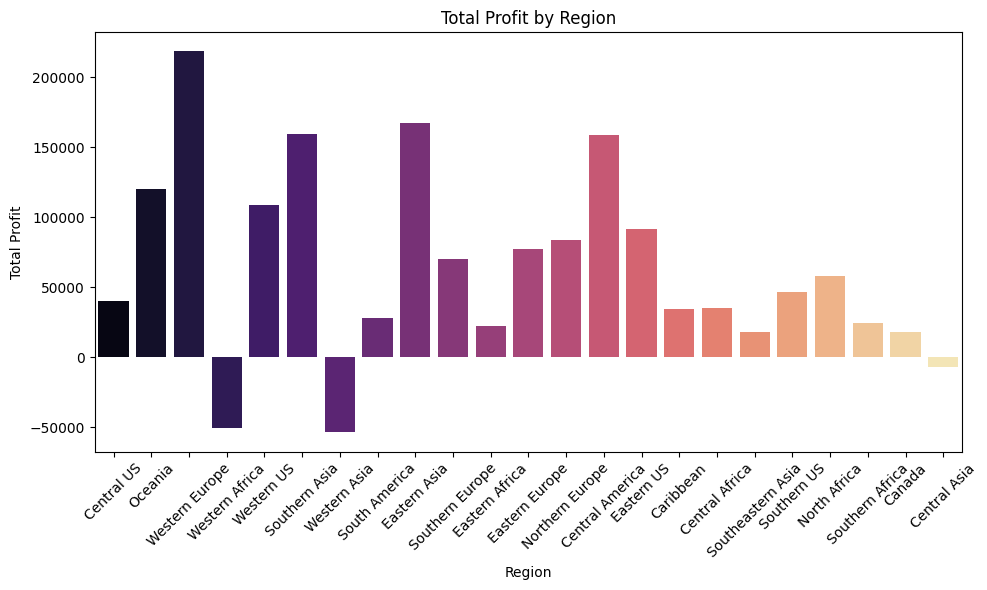

In [ ]:
# Profit by Region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='magma')
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-3721511756.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Shipping Delay', data=df, estimator=np.mean, ci=None, palette='coolwarm')
/tmp/ipython-input-8-3721511756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Shipping Delay', data=df, estimator=np.mean, ci=None, palette='coolwarm')


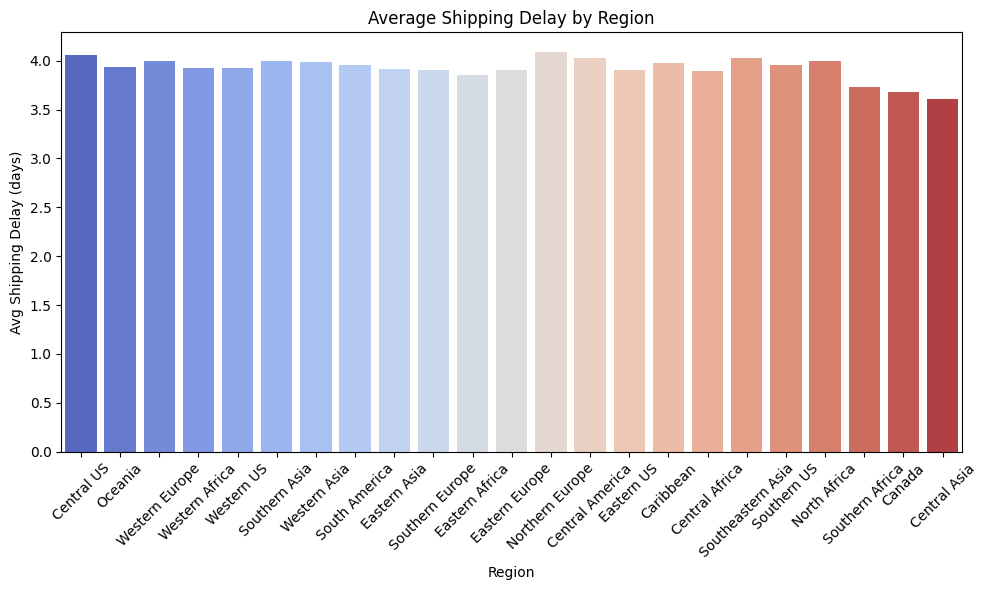

In [ ]:
# Average Shipping Delay by Region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Shipping Delay', data=df, estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Average Shipping Delay by Region')
plt.ylabel('Avg Shipping Delay (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

# Returns Analysis if column exists
if 'Returned' in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x='Returned', data=df)
    plt.title('Return Count')
    plt.tight_layout()
    plt.show()

    # Returns by Region
    returns_by_region = df[df['Returned'] == 'Yes'].groupby('Region').size()
    returns_by_region.plot(kind='bar', title='Returns by Region', color='salmon')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


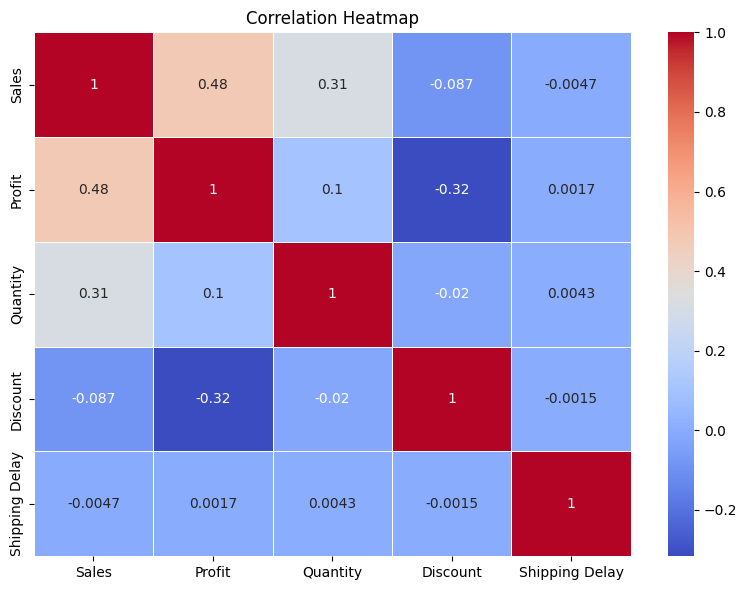

In [ ]:
# Correlation Heatmap
numerical_cols = ['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Delay']
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

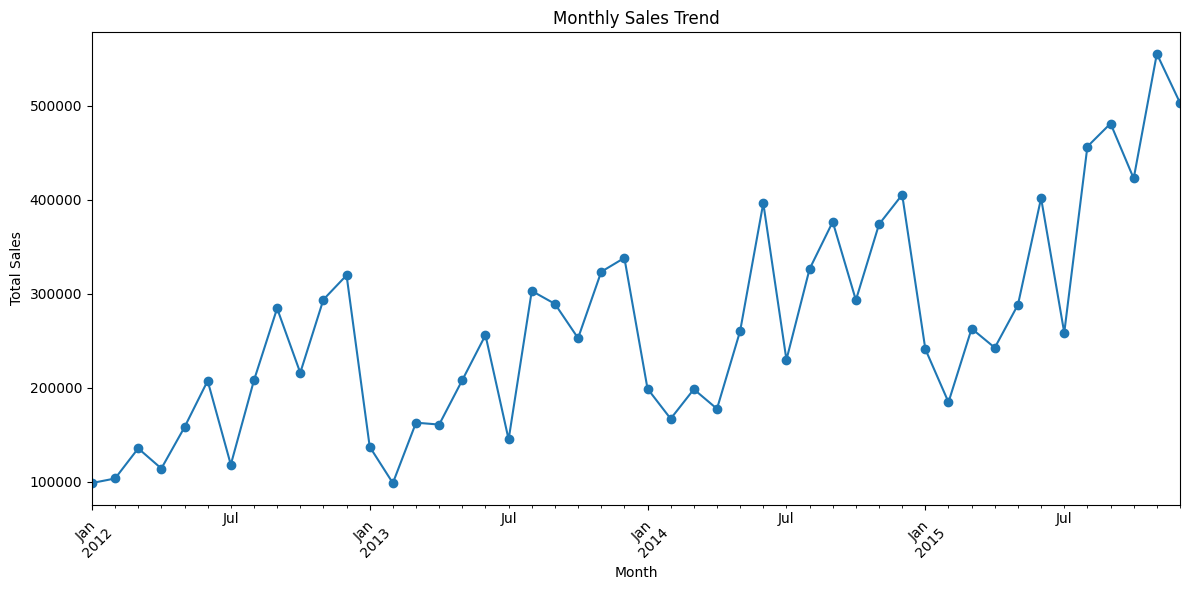

In [ ]:
# Monthly Sales Trend
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(figsize=(12,6), title='Monthly Sales Trend', marker='o')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

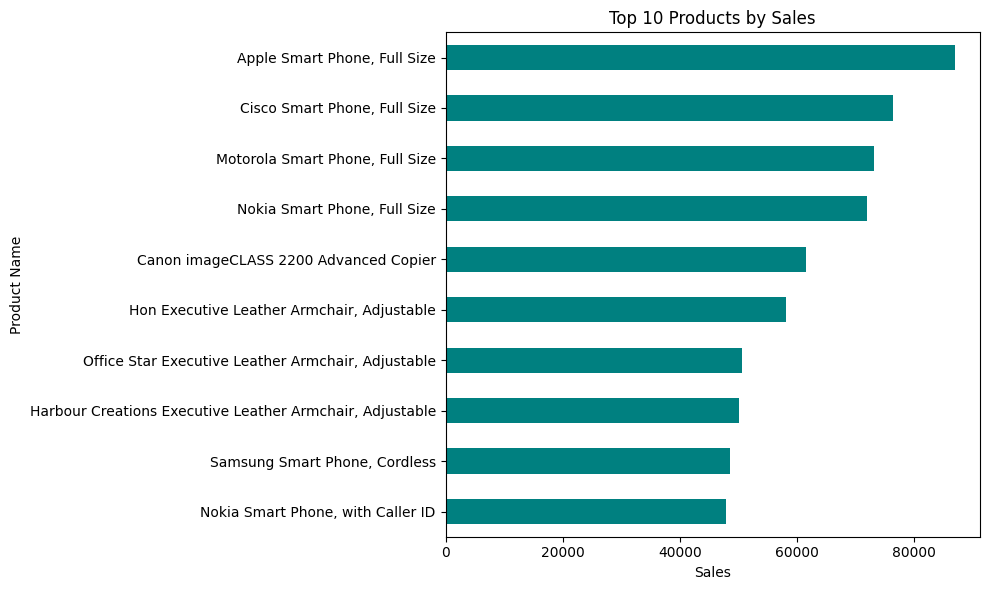

In [ ]:
# Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,6), title='Top 10 Products by Sales', color='teal')
plt.xlabel('Sales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **ACCURACCY**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'global_superstore_2016.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Preprocessing
df.dropna(subset=['Order Date', 'Ship Date', 'Region', 'Sales', 'Profit'], inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days
df = df[(df['Shipping Delay'] >= 0) & (df['Shipping Delay'] <= 30)]

# Add targets
df['Profitable'] = (df['Profit'] > 0).astype(int)
df['High_Delay'] = (df['Shipping Delay'] > 7).astype(int)

# Fake "Returned" column if not exists
if 'Returned' not in df.columns:
    np.random.seed(42)
    df['Returned'] = np.random.choice(['Yes', 'No'], size=len(df), p=[0.1, 0.9])
df['Returned_Flag'] = (df['Returned'] == 'Yes').astype(int)

# Select features
features = ['Sales', 'Discount', 'Quantity', 'Shipping Delay', 'Region', 'Ship Mode', 'Segment']
df = df[features + ['Profitable', 'High_Delay', 'Returned_Flag']].dropna()

# Encode categoricals
label_encoders = {}
for col in ['Region', 'Ship Mode', 'Segment']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Function to train and evaluate models
def train_and_evaluate_model(X, y, model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📌 {name} - Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    return model, X_train.columns

# Feature set
X = df[features]

# --- 1. Predict Profitable ---
print("\n🟢 Predicting Profitable Orders")
y_profit = df['Profitable']
model_dt, cols = train_and_evaluate_model(X, y_profit, DecisionTreeClassifier(random_state=0), "Decision Tree")
model_rf, _ = train_and_evaluate_model(X, y_profit, RandomForestClassifier(random_state=0), "Random Forest")
model_xgb, _ = train_and_evaluate_model(X, y_profit, XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")


# --- 2. Predict High Shipping Delay ---
print("\n🟡 Predicting High Shipping Delays")
from xgboost import XGBClassifier

model_xgb_return, _ = train_and_evaluate_model(
    X, y_return,
    XGBClassifier(eval_metric='logloss'),
    "XGBoost (Returns)"
)


# --- 3. Predict Returns ---
print("\n🔴 Predicting Returns")
y_return = df['Returned_Flag']
model_xgb_return, _ = train_and_evaluate_model(X, y_return, XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost (Returns)")






🟢 Predicting Profitable Orders

📌 Decision Tree - Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2658
           1       0.92      0.92      0.92      7600

    accuracy                           0.88     10258
   macro avg       0.84      0.84      0.84     10258
weighted avg       0.88      0.88      0.88     10258


📌 Random Forest - Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      2658
           1       0.92      0.95      0.94      7600

    accuracy                           0.91     10258
   macro avg       0.89      0.86      0.88     10258
weighted avg       0.91      0.91      0.91     10258



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:19:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📌 XGBoost - Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2658
           1       0.92      0.97      0.95      7600

    accuracy                           0.92     10258
   macro avg       0.91      0.87      0.89     10258
weighted avg       0.92      0.92      0.91     10258


🟡 Predicting High Shipping Delays

📌 XGBoost (Returns) - Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9246
           1       0.25      0.00      0.00      1012

    accuracy                           0.90     10258
   macro avg       0.58      0.50      0.47     10258
weighted avg       0.84      0.90      0.85     10258


🔴 Predicting Returns


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:19:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📌 XGBoost (Returns) - Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9246
           1       0.25      0.00      0.00      1012

    accuracy                           0.90     10258
   macro avg       0.58      0.50      0.47     10258
weighted avg       0.84      0.90      0.85     10258



/tmp/ipython-input-14-835173411.py:6: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


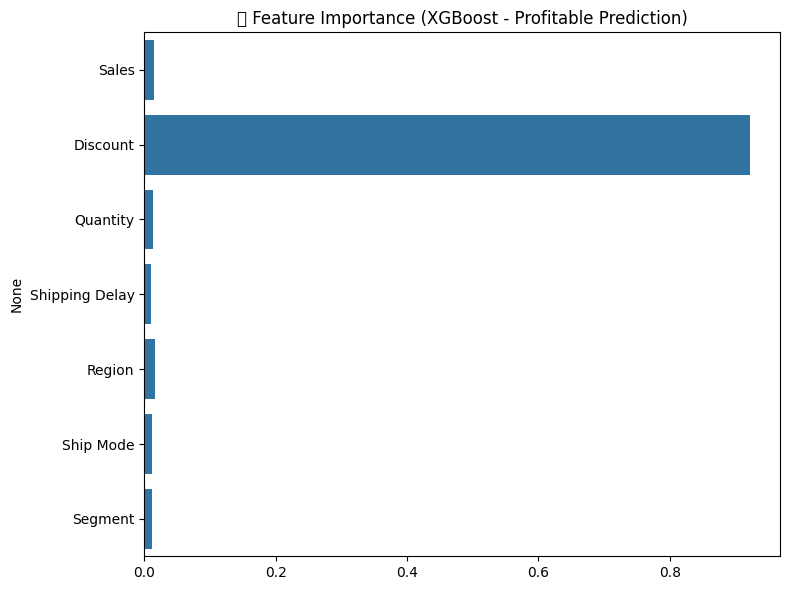

In [ ]:
# --- Feature Importance for XGBoost ---
plt.figure(figsize=(8, 6))
importances = model_xgb.feature_importances_
sns.barplot(x=importances, y=cols)
plt.title("🔍 Feature Importance (XGBoost - Profitable Prediction)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-15-1505387470.py:5: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


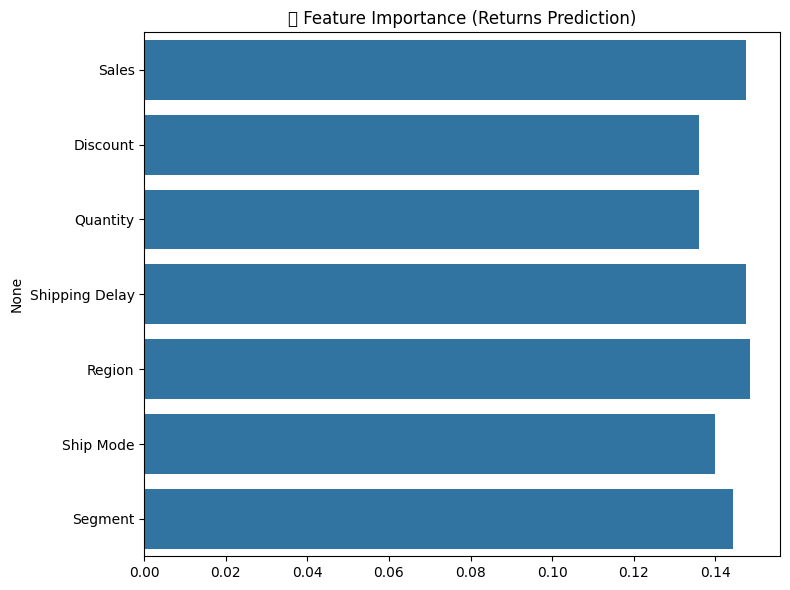

In [ ]:
# --- Optional: Show feature importance for returns ---
plt.figure(figsize=(8, 6))
sns.barplot(x=model_xgb_return.feature_importances_, y=cols)
plt.title("🔍 Feature Importance (Returns Prediction)")
plt.tight_layout()
plt.show()


# **Predict Next 5-Month Sales**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwug8485g/uejbyq19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwug8485g/08b3ir4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77010', 'data', 'file=/tmp/tmpwug8485g/uejbyq19.json', 'init=/tmp/tmpwug8485g/08b3ir4b.json', 'output', 'file=/tmp/tmpwug8485g/prophet_model9tmdo_wp/prophet_model-20250704082152.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:21:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

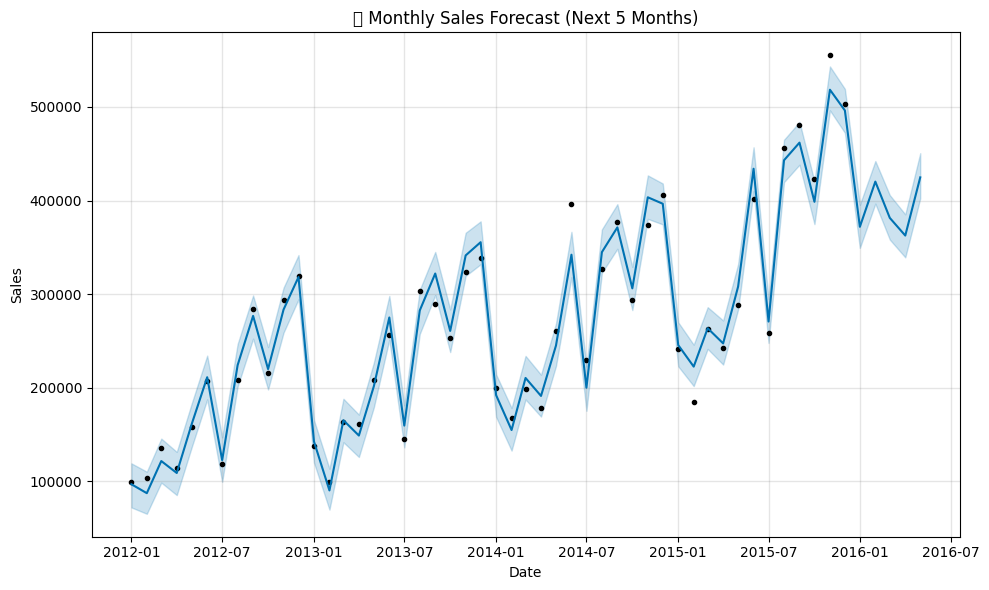

🔮 Forecasted Sales for Next 5 Months:
           ds           yhat
48 2015-12-31  371915.290603
49 2016-01-31  420232.711157
50 2016-02-29  381426.002170
51 2016-03-31  362553.935086
52 2016-04-30  424756.409716


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_excel("global_superstore_2016.xlsx", engine='openpyxl')
df.columns = df.columns.str.strip()

# Check and clean date column
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.dropna(subset=['Order Date', 'Sales'], inplace=True)

# Aggregate monthly sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()
monthly_sales.columns = ['ds', 'y']  # Prophet requires columns: ds (date), y (value)

# Initialize and fit Prophet
model = Prophet()
model.fit(monthly_sales)

# Create future dataframe (next 5 months)
future = model.make_future_dataframe(periods=5, freq='M')

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title('📈 Monthly Sales Forecast (Next 5 Months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Print last 5 months of prediction
next_5_months = forecast[['ds', 'yhat']].tail(5)
print("🔮 Forecasted Sales for Next 5 Months:")
print(next_5_months)


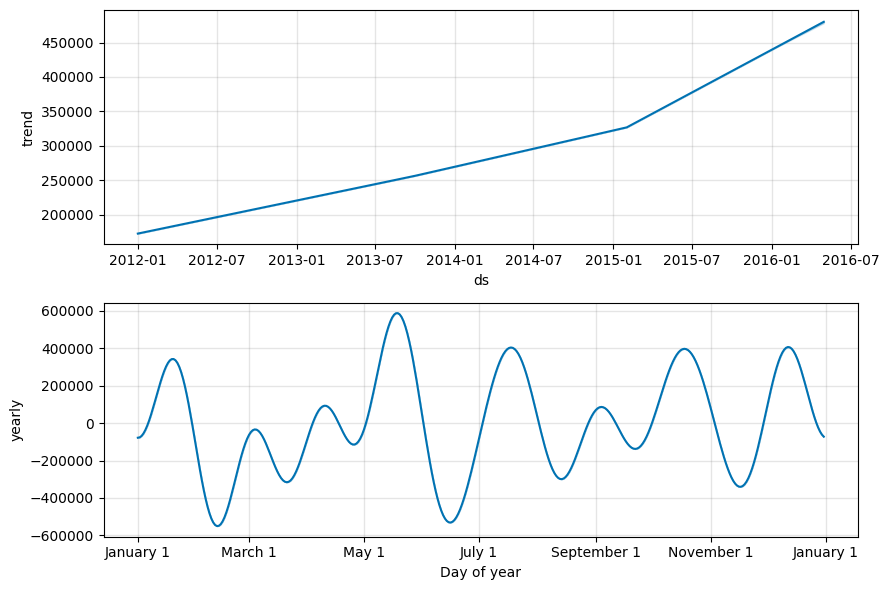

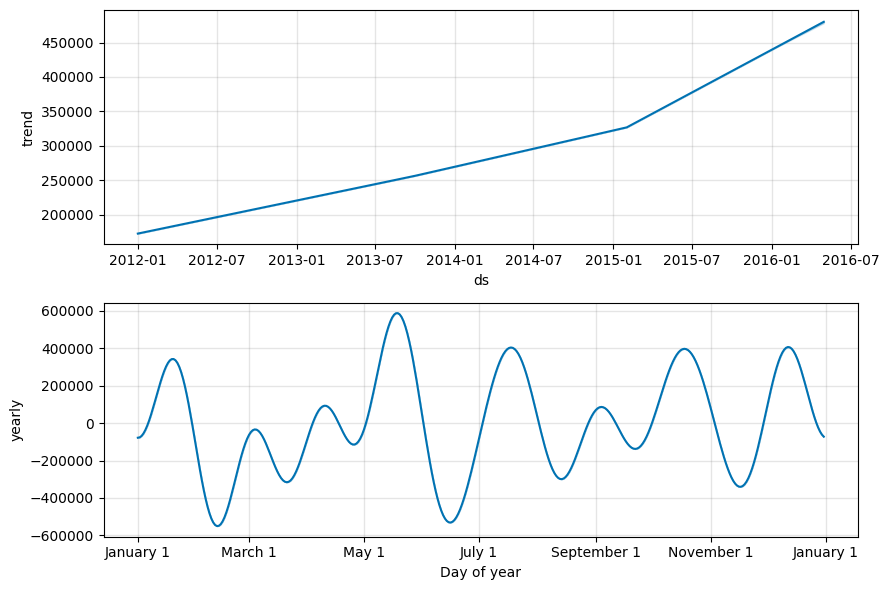

In [ ]:
model.plot_components(forecast)
